In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame from the given data

df = pd.read_csv("C:/Users/Sohel's PC/Desktop/DSML_Practical/Datasets(1)/Datasets/IRIS.csv")

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
#As in given dataset [sepal_length,sepal_width,petal_length,petal_width] are the only numeric features,we will use them for boxplot creation
features=["sepal_length","sepal_width","petal_length","petal_width"]

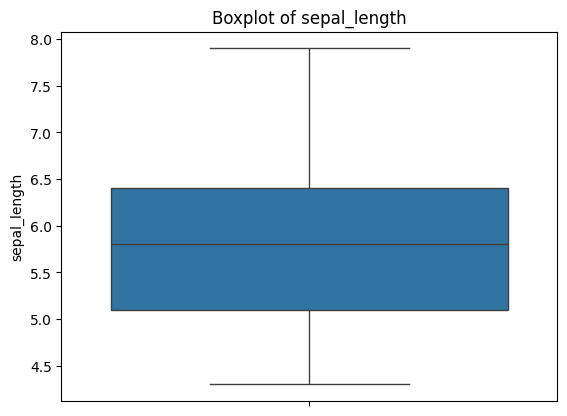

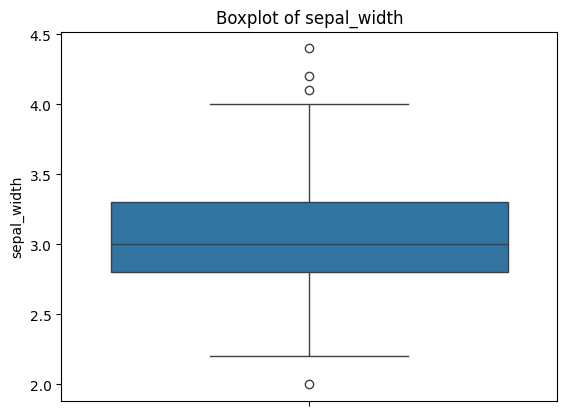

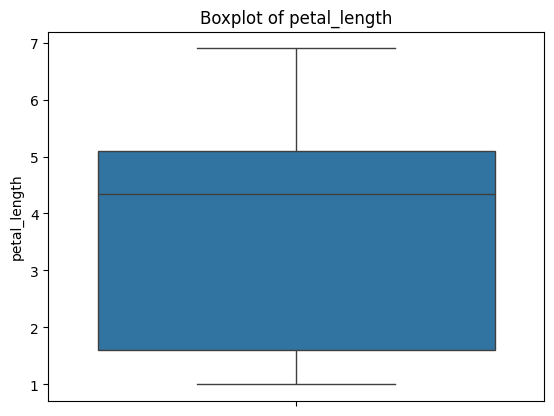

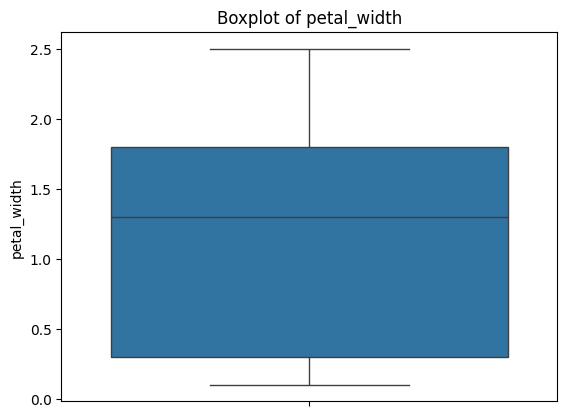

In [14]:
for feature in features:
  sns.boxplot(df[feature])
  plt.title(f"Boxplot of {feature}")
  plt.show()

#As seen from above distribution,sepal width has 4 outliers,now we can idenfity those outliers using a simple fucntion

For each feature:

The IQR is computed.

Rows in the DataFrame where the feature's value lies outside [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] are identified.

Those rows are stored in the outliers DataFrame and printed.


In [ ]:
# Simple outlier detection
def find_outliers(df, feature):
    Q1 = df[feature].quantile(0.25) #represents 25% values are less than Q1
    Q3 = df[feature].quantile(0.75) #represents 75% values are less than Q3
    IQR = Q3 - Q1 #Interquartile Range (IQR)
    outliers = df[(df[feature] < Q1 - 1.5 * IQR) |
                  (df[feature] > Q3 + 1.5 * IQR)]
    return outliers

# Find and print outliers for each feature
for feature in features:
    outliers = find_outliers(df, feature)
    if not outliers.empty:
        print(f"\nOutliers in {feature}:")
        print(outliers[[feature, 'species']])


Outliers in sepal_width:
    sepal_width          species
15          4.4      Iris-setosa
32          4.1      Iris-setosa
33          4.2      Iris-setosa
60          2.0  Iris-versicolor


#Just for better understanding of how to do it:

In [11]:
q1=df["sepal_width"].quantile(0.25)
q3=df["sepal_width"].quantile(0.75)
print(q1)
print(q3)
iqr=q3-q1
lower_boundary=q1-(iqr*1.5)
upper_boundary=q3+(iqr*1.5)
outlier = df[(df["sepal_width"] < lower_boundary) | (df["sepal_width"] > upper_boundary)]
print(outlier)

2.8
3.3
    sepal_length  sepal_width  petal_length  petal_width          species
15           5.7          4.4           1.5          0.4      Iris-setosa
32           5.2          4.1           1.5          0.1      Iris-setosa
33           5.5          4.2           1.4          0.2      Iris-setosa
60           5.0          2.0           3.5          1.0  Iris-versicolor


#Code explanation:

Compute Quartiles and IQR:

The quantile() function calculates the 25th percentile (Q1) and 75th percentile (Q3) of the sepal_width column.
The Interquartile Range (IQR) is the difference between Q3 and Q1:
IQR=Q3−Q1
This gives the range of the middle 50% of the data.
Calculate Boundaries:
The lower boundary is:
Lower Boundary=Q1−(1.5×IQR)
The upper boundary is:
Upper Boundary=Q3+(1.5×IQR)
These boundaries define the "fence" beyond which data points are considered outliers.

#Note when there are so many rows in a single feature then why using "df[(df["sepal_width"] < lower_boundary) | (df["sepal_width"] > upper_boundary)]" this operation give us all the otuliers at  oncee??

=>Pandas operates on entire columns (or Series) at once using vectorized operations. Instead of looping through each row individually, pandas checks the condition for all rows simultaneously and generates a boolean mask, which is then applied to filter the rows.